In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
conda install -c conda-forge scikit-plot

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install yfinance
!pip install investpy
!pip install pykrx
!pip install seaborn
!pip install workalendar
!pip install --upgrade finance-datareader

You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install TA_Lib-0.4.19-cp38-cp38-win_amd64.whl

Processing c:\users\user\downloads\ta_lib-0.4.19-cp38-cp38-win_amd64.whl
TA-Lib is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install -U finance-datareader

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


In [6]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import yfinance as yf # yahoo finance API    # pip install yfinance
import investpy # investing.com API          # pip install investpy
from pykrx import stock # krx API           # pip instasll pykrx
import talib as ta # 기술적 분석 (보조지표)
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import requests as re
from bs4 import BeautifulSoup
from pandas import DataFrame, Series
import numpy as np
import pandas as pd
import os

In [8]:
folder_adress = 'C:/Users/user/Downloads/model' 
def get_trading_trend():
    url = 'http://finance.naver.com/sise/investorDealTrendDay.nhn?bizdate=20210216&sosok=&page='
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
    #response = requests.get(news_url,headers = headers)

    date_list = []
    private = []
    foreign = []
    institution = []

    for i in range(1,500):
        url_ = re.get(url + str(i),headers = headers)
        url_.encoding = 'euc-kr' #한글깨짐방지
        url_ = url_.content
        html = BeautifulSoup(url_,'html.parser')
    
        body = html.find('body')
    
        tr = body.find_all('tr')

        for r in tr:
            date = r.find('td',{'class':'date2'})
    
            if date != None:
                date = date.text.strip().replace('.','-')
                date = date[6:] + '-' + date[3:5] + '-' + date[:2]
                #date = date.text.insert('20-01-01')
                #date = date.text.insert('2020-01-01')
                
                
                # 날짜가 중첩되지 않으면 계속 크롤링 : 
                if not date in date_list:
                    date_list.append(date)
                    #print(date)
                
                # 더 이상 자료가 없어, 날짜가 중첩되면 : 크롤링 완료
                else:
                    #Data = DataFrame(index = date_list)
                    Data = DataFrame()
                    Data['date'] = date_list
                    Data['private'] = private
                    Data['foreign'] = foreign
                    Data['institution'] = institution
                    
                    Data.to_csv(folder_adress+'/trading_trend.csv')
                    return Data
                
                td = r.find_all('td')
        
                count = 0
        
                # 앞에서 3개 값 '개인' , '외국인' , '기관' 만 가져온다
                for d in td:
                    if count != 3:
                        d = d.text.replace(',','')
                    try:
                        d = int(d)
                    
                        if count == 0 :
                            private.append(d)
                        elif count == 1 :
                            foreign.append(d)
                        else:
                            institution.append(d)
                        
                        count += 1
                    
                    except:
                        count = count

In [9]:
samsung_etc = pd.read_csv('C:/Users/user/Downloads/model/trading_trend.csv',parse_dates=['date'])

In [10]:
samsung_etc

,Unnamed: 0,date,private,foreign,institution
0,0,2021-02-16,4226,2416,-6685
1,1,2021-02-15,-3526,7317,-4193
2,2,2021-10-02,1302,7520,-9166
3,3,2021-09-02,487,-2223,1568
4,4,2021-08-02,847,-3584,2805
...,...,...,...,...,...
3982,3982,2005-07-01,1143,178,-1321
3983,3983,2005-06-01,858,-6,-852
3984,3984,2005-05-01,10,246,-256
3985,3985,2005-04-01,-63,397,-334


In [11]:
samsung_etc = samsung_etc.drop(['Unnamed: 0'], axis=1)

In [12]:
samsung_etc = samsung_etc.set_index("date")

In [13]:
samsung_etc

,private,foreign,institution
date,,,
2021-02-16,4226,2416,-6685
2021-02-15,-3526,7317,-4193
2021-10-02,1302,7520,-9166
2021-09-02,487,-2223,1568
2021-08-02,847,-3584,2805
...,...,...,...
2005-07-01,1143,178,-1321
2005-06-01,858,-6,-852
2005-05-01,10,246,-256


In [14]:
# 크롤링 start_date, end_date
start_date='2019-01-01'
#input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2018-01-01 : ')
end_date='2020-01-01'
#input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2020-10-13 : ')

# 크롤링 start_date, end_date
_start_date='2020-01-01'
#input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2018-01-01 : ')
_end_date='2021-02-15'

In [15]:
# investing.com 양식, ex) dd/mm/yyyy
start_date_ = start_date[8:] + '/' + start_date[5:7] + '/' + start_date[:4]
end_date_ = end_date[8:] + '/' + end_date[5:7] + '/' + end_date[:4]

# krx 양식 ex) yyyymmdd
start_date__ = start_date[0:4] + start_date[5:7] + start_date[8:10]
end_date__ = end_date[0:4] + end_date[5:7] + end_date[8:10]


__start_date = _start_date[8:] + '/' + _start_date[5:7] + '/' + _start_date[:4]
__end_date = _end_date[8:] + '/' + _end_date[5:7] + '/' + _end_date[:4]

# krx 양식 ex) yyyymmdd
___start_date = _start_date[0:4] + _start_date[5:7] + _start_date[8:10]
___end_date = _end_date[0:4] + _end_date[5:7] + _end_date[8:10]


In [16]:
# 코로나 이전날짜
# 주요 3개국 대비 원 환율
# 달러/원
exchange_rate_usd_ = investpy.get_currency_cross_historical_data(currency_cross='USD/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_usd_.columns = ['exchange_rate_usd_Open', 'exchange_rate_usd_High', 'exchange_rate_usd_Low', 'exchange_rate_usd_Close', 'exchange_rate_usd_Currency']
exchange_rate_usd_ = exchange_rate_usd_.drop(['exchange_rate_usd_Open','exchange_rate_usd_High','exchange_rate_usd_Low','exchange_rate_usd_Currency'], axis=1)

# 삼성 차트 데이터
sam_ = stock.get_market_ohlcv_by_date(start_date__, end_date__, "005930")
sam_.columns = ['Open','High','Low','Close','Volume']
model_samsung = sam_.copy()

# 3) MACD 이동평균수렴확산 (단기(EMA12)와 장기(EMA26) EMA로 모멘텀을 추정)
#macd, macdsignal9, macdhist = ta.MACD(model_samsung.Close, fastperiod=12, slowperiod=26, signalperiod=9)
#model_samsung['macd'] = macd

# 미국 국채 수익률 (5년)
treasury_5y_ = yf.download("^FVX", start=start_date, end=end_date)
treasury_5y_.columns = ['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Close','treasury_5y_Adj Close','treasury_5y_Volume']
treasury_5y_ = treasury_5y_.drop(['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Adj Close','treasury_5y_Volume'], axis=1)

# HANG SENG
hang_seng_ = yf.download("^HSI", start=start_date, end=end_date)
hang_seng_.columns = ['hang_seng_Open','hang_seng_High','hang_seng_Low','hang_seng_Close','hang_seng_Adj Close','hang_seng_Volume']
hang_seng_ = hang_seng_.drop(['hang_seng_Open','hang_seng_High','hang_seng_Low','hang_seng_Adj Close','hang_seng_Volume'], axis=1)

# Russell 2000
russell_2000_ = yf.download("^RUT", start=start_date, end=end_date)
russell_2000_.columns = ['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Close','russell_2000_Adj Close','russell_2000_Volume']
russell_2000_ = russell_2000_.drop(['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Adj Close','russell_2000_Volume'], axis=1)

# SOX 지수 엔비디아(8.9%), 텍사스인스트루먼트(8.6%), 퀄컴(7.7%), 인텔(7.4%) 반도체장비기업 18.52%
SOXX = yf.download("SOXX", start=start_date, end=end_date)
SOXX.columns = ['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Close','SOXX_Adj Close','SOXX_Volume']
SOXX = SOXX.drop(['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Adj Close','SOXX_Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [17]:
# 코로나 이후날짜
# 주요 3개국 대비 원 환율
# 달러/원
exchange_rate_usd__ = investpy.get_currency_cross_historical_data(currency_cross='USD/KRW', from_date=__start_date, to_date=__end_date)
exchange_rate_usd__.columns = ['exchange_rate_usd_Open', 'exchange_rate_usd_High', 'exchange_rate_usd_Low', 'exchange_rate_usd_Close', 'exchange_rate_usd_Currency']
exchange_rate_usd__= exchange_rate_usd__.drop(['exchange_rate_usd_Open','exchange_rate_usd_High','exchange_rate_usd_Low','exchange_rate_usd_Currency'], axis=1)

# 삼성 차트 데이터
sam__ = stock.get_market_ohlcv_by_date(___start_date, ___end_date, "005930")
sam__.columns = ['Open','High','Low','Close','Volume']
model_samsung_ = sam__.copy()

# 3) MACD 이동평균수렴확산 (단기(EMA12)와 장기(EMA26) EMA로 모멘텀을 추정)
#macd_, macdsignal9_, macdhist_ = ta.MACD(model_samsung_.Close, fastperiod=12, slowperiod=26, signalperiod=9)
#model_samsung_['macd'] = macd_

# 미국 국채 수익률 (5년)
treasury_5y__ = yf.download("^FVX", start=_start_date, end=_end_date)
treasury_5y__.columns = ['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Close','treasury_5y_Adj Close','treasury_5y_Volume']
treasury_5y__ = treasury_5y__.drop(['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Adj Close','treasury_5y_Volume'], axis=1)

# HANG SENG
hang_seng__ = yf.download("^HSI", start=_start_date, end=_end_date)
hang_seng__.columns = ['hang_seng_Open','hang_seng_High','hang_seng_Low','hang_seng_Close','hang_seng_Adj Close','hang_seng_Volume']
hang_seng__ = hang_seng__.drop(['hang_seng_Open','hang_seng_High','hang_seng_Low','hang_seng_Adj Close','hang_seng_Volume'], axis=1)

# Russell 2000
russell_2000__ = yf.download("^RUT", start=_start_date, end=_end_date)
russell_2000__.columns = ['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Close','russell_2000_Adj Close','russell_2000_Volume']
russell_2000__ = russell_2000__.drop(['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Adj Close','russell_2000_Volume'], axis=1)

# SOX 지수 엔비디아(8.9%), 텍사스인스트루먼트(8.6%), 퀄컴(7.7%), 인텔(7.4%) 반도체장비기업 18.52%
SOXX_ = yf.download("SOXX", start=_start_date, end=_end_date)
SOXX_.columns = ['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Close','SOXX_Adj Close','SOXX_Volume']
SOXX_ = SOXX_.drop(['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Adj Close','SOXX_Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [18]:
#model_samsung['US'] = exchange_rate_usd_
#model_samsung['SOXX'] = SOXX
#model_samsung['TREASURY_5Y']=treasury_5y_
#model_samsung['hang_seng'] = hang_seng_
#model_samsung['RUSSELL2000'] = russell_2000_

In [19]:
#model_samsung_['US'] = exchange_rate_usd__
#model_samsung_['SOXX'] = SOXX_
#model_samsung_['TREASURY_5Y']=treasury_5y__
#model_samsung_['hang_seng'] = hang_seng__
#model_samsung_['RUSSELL2000'] = russell_2000__

In [20]:
model_samsung = model_samsung.drop(['Open','High','Low'],axis=1)
model_samsung_ = model_samsung_.drop(['Open','High','Low'],axis=1)


In [21]:
samsung_etc

,private,foreign,institution
date,,,
2021-02-16,4226,2416,-6685
2021-02-15,-3526,7317,-4193
2021-10-02,1302,7520,-9166
2021-09-02,487,-2223,1568
2021-08-02,847,-3584,2805
...,...,...,...
2005-07-01,1143,178,-1321
2005-06-01,858,-6,-852
2005-05-01,10,246,-256


In [22]:
samsung_etc.dtypes

private        int64
foreign        int64
institution    int64
dtype: object

In [23]:
model_samsung = pd.concat([model_samsung,samsung_etc],axis=1)
model_samsung_ = pd.concat([model_samsung_,samsung_etc],axis=1)

In [24]:
model_samsung = model_samsung.dropna() # 결측치가 있는 행 제거
model_samsung_ = model_samsung_.dropna() # 결측치가 있는 행 제거

In [25]:
model_samsung

,Close,Volume,private,foreign,institution
2019-01-02,38750.0,7847664.0,-749.0,2668.0,-2145.0
2019-01-04,37450.0,14108958.0,-4381.0,2491.0,1846.0
2019-01-07,38750.0,12748997.0,-191.0,1545.0,61.0
2019-01-08,38100.0,12756554.0,-873.0,-51.0,836.0
2019-01-10,39800.0,14731699.0,-1585.0,-1426.0,2951.0
...,...,...,...,...,...
2019-12-23,55500.0,9839252.0,-3219.0,-489.0,3545.0
2019-12-24,55000.0,11868463.0,-1081.0,-1670.0,2584.0
2019-12-26,55400.0,9645034.0,-4673.0,-401.0,4605.0
2019-12-27,56500.0,12313056.0,1925.0,642.0,-2790.0


In [26]:
# 차트 비교분석을 위한 정규화
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(model_samsung)
output = min_max_scaler.transform(model_samsung)
output = pd.DataFrame(output, columns=model_samsung.columns, index=list(model_samsung.index.values))
print(output.head())

               Close    Volume   private   foreign  institution
2019-01-02  0.067532  0.138911  0.506565  0.671545     0.301592
2019-01-04  0.000000  0.391666  0.305335  0.660971     0.580215
2019-01-07  0.067532  0.336768  0.537481  0.604457     0.455599
2019-01-08  0.033766  0.337073  0.499695  0.509110     0.509704
2019-01-10  0.122078  0.416805  0.460247  0.426967     0.657358


In [27]:
# 차트 비교분석을 위한 정규화
from sklearn.preprocessing import MinMaxScaler
min_max_scaler_ = MinMaxScaler()
fitted_ = min_max_scaler_.fit(model_samsung_)
output_ = min_max_scaler_.transform(model_samsung_)
output_ = pd.DataFrame(output_, columns=model_samsung_.columns, index=list(model_samsung_.index.values))
print(output_.head())

               Close    Volume   private   foreign  institution
2020-01-06  0.275424  0.030329  0.201878  0.679736     0.760963
2020-01-07  0.281780  0.025022  0.279845  0.606299     0.709523
2020-01-09  0.341102  0.302864  0.319352  0.595104     0.648280
2020-01-13  0.370763  0.051625  0.269908  0.719160     0.601565
2020-01-14  0.370763  0.160988  0.301263  0.720928     0.538550


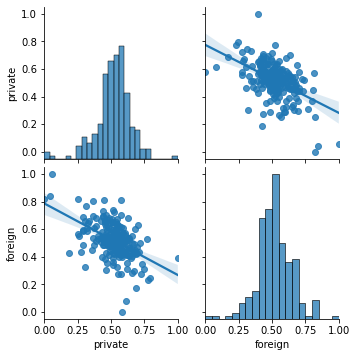

In [28]:
import seaborn as sns
sns.pairplot(output[['private', 'foreign']], kind='reg')

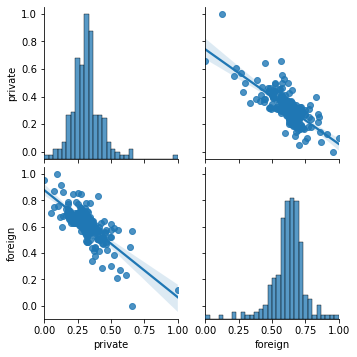

In [29]:
import seaborn as sns
#sns.pairplot(returns[1:]) ## pairplot은 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램과 분포도 첫번째 행은 null 값이므로 제외하고 수행
sns.pairplot(output_[['private', 'foreign']], kind='reg')

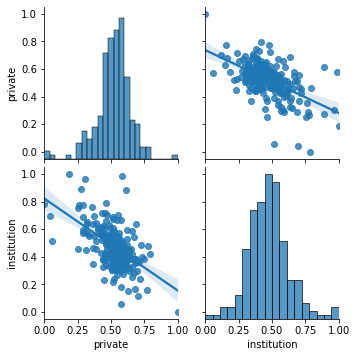

In [30]:
import seaborn as sns
sns.pairplot(output[['private', 'institution']], kind='reg')

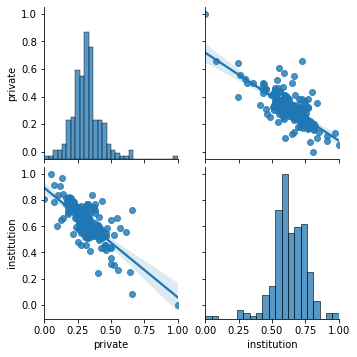

In [31]:
import seaborn as sns
sns.pairplot(output_[['private', 'institution']], kind='reg')

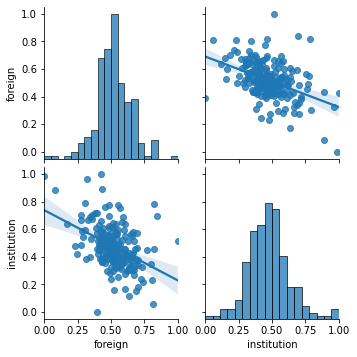

In [32]:
import seaborn as sns
#sns.pairplot(returns[1:]) ## pairplot은 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램과 분포도 첫번째 행은 null 값이므로 제외하고 수행
sns.pairplot(output[['foreign','institution']], kind='reg')

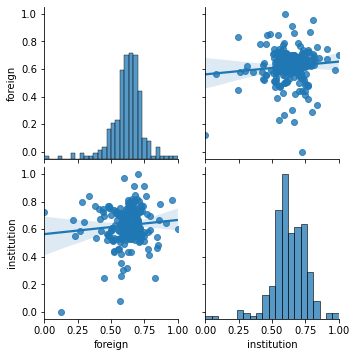

In [33]:
import seaborn as sns
#sns.pairplot(returns[1:]) ## pairplot은 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램과 분포도 첫번째 행은 null 값이므로 제외하고 수행
sns.pairplot(output_[['foreign','institution']], kind='reg')

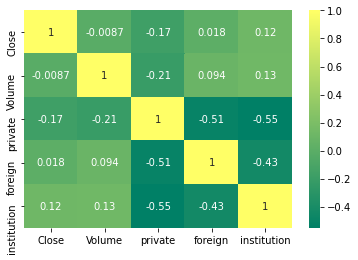

In [34]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(model_samsung.corr(), annot=True, cmap='summer')

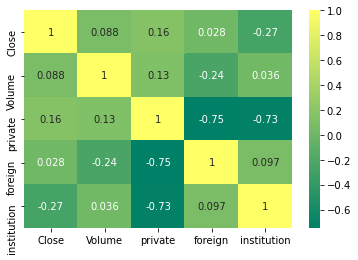

In [35]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(model_samsung_.corr(), annot=True, cmap='summer')

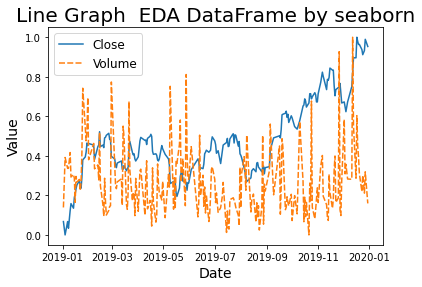

In [36]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output[['Close', 'Volume']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

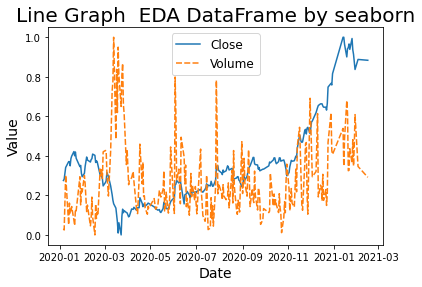

In [37]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output_[['Close', 'Volume']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

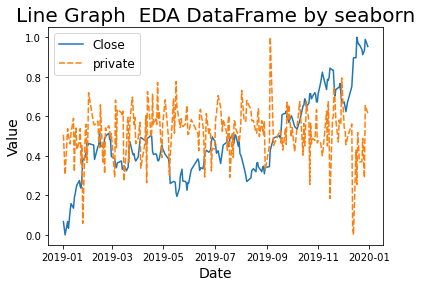

In [38]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output[['Close', 'private']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

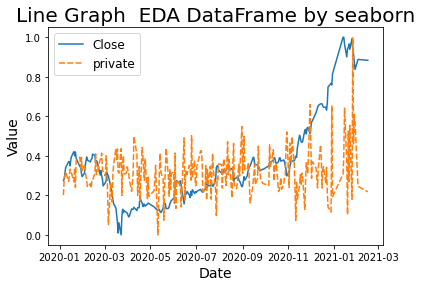

In [39]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output_[['Close', 'private']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

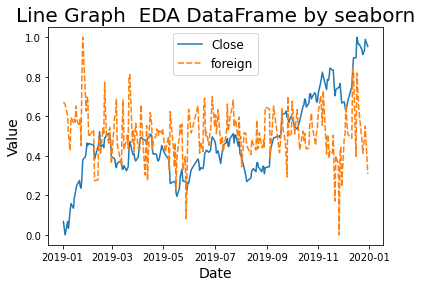

In [40]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output[['Close', 'foreign']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

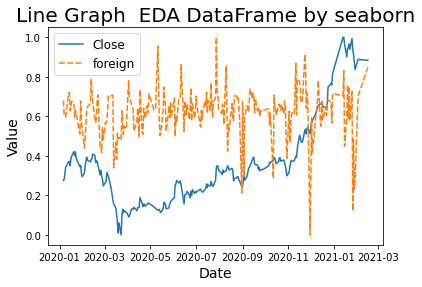

In [41]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output_[['Close', 'foreign']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

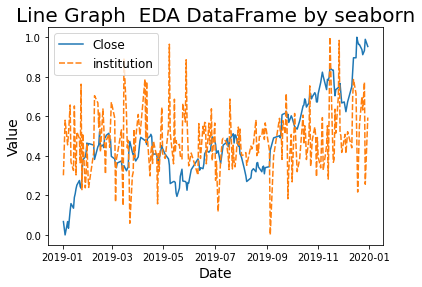

In [42]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output[['Close', 'institution']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

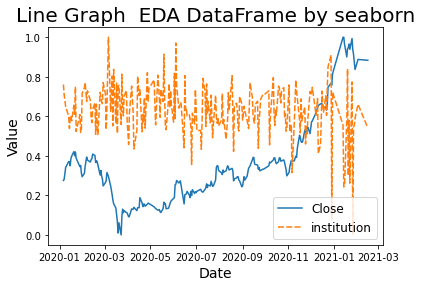

In [43]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output_[['Close', 'institution']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()